In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import random
import time

In [3]:
class ShufflingGeneratorWithRange:
    def __init__(self, seed, upper_bound):
        self.size = len(str(seed))
        self.state = seed
        self.upper_bound = upper_bound

    def next(self):
        # Вычисляем смещение на 1/4 длины ячейки
        shift = len(str(self.state)) // 4

        # Циклический сдвиг влево на 1/4 длины ячейки
        left_shifted = int(str(self.state)[shift:] + str(self.state)[:shift])

        # Циклический сдвиг вправо на 1/4 длины ячейки
        right_shifted = int(str(self.state)[-shift:] + str(self.state)[:-shift])
        
        # Сумма полученных чисел
        new_number = int(str(left_shifted + right_shifted)[:self.size])
        
        # Обновляем состояние
        self.state = new_number

        return new_number % self.upper_bound


In [4]:
class StdGeneratorWithRange:
    def __init__(self, upper_bound):
        self.upper_bound = upper_bound
        
    def next(self):
        return random.randint(0, self.upper_bound)
    

In [5]:
class RandomNumberAnalyzer:
    def __init__(self, generator, sample_size):
        self.generator = generator
        self.sample_size = sample_size
        self.random_numbers = []

    def generate_numbers(self):
        self.random_numbers = [self.generator.next() for _ in range(self.sample_size)]

    def calculate_statistics(self):
        mean = sum(self.random_numbers) / self.sample_size
        variance = sum((x - mean) ** 2 for x in self.random_numbers) / self.sample_size
        std_deviation = math.sqrt(variance)
        return mean, variance, std_deviation

    def plot_distribution(self):
        num_bins = self._bins(self.sample_size)
        plt.hist(
            self.random_numbers, 
            bins=num_bins, 
            weights=np.ones(self.sample_size) / self.sample_size, 
            edgecolor='black'
        )
        plt.hlines(1/num_bins, 0, max(self.random_numbers), linestyles='dashed', color='red')
        plt.title(f'Distribution Plot ({self.sample_size} numbers)')
        plt.xlabel('Random Numbers')
        plt.ylabel('Frequency')
        plt.show()
        
    def _bins(self, sample_size_value):
        if sample_size_value <= 100:
            return 10
        elif sample_size_value <= 10000:
            return 100
        else:
            return 1000
        
    def analyze(self):
        self.generate_numbers()
        statistics = self.calculate_statistics()
        self.plot_distribution()

        result_table = pd.DataFrame({
            'Sample Size': [self.sample_size],
            'Mean': [statistics[0]],
            'Variance': [statistics[1]],
            'Std Deviation': [statistics[2]]
        })

        print(result_table)

In [6]:

class RandomNumberComparator:
    
    def __init__(self, generator, mean):
        self.generator = generator
        self.mean = mean
        
        self.sample_size = 10000
        self.batch_size = 1000
        self.random_numbers = []
    
    def generate_numbers(self):
        self.random_numbers = [self.generator.next() for _ in range(self.sample_size)]
        
    def calculate_mean(self, random_numbers):
        return sum(random_numbers) / len(random_numbers)
    
    def analyze(self):
        self.generate_numbers()
        
        result_table = pd.DataFrame(columns=['M1', 'M1-M', 'M2', 'M2-M'])
        
        for idx in range(10):
            offset = idx * self.batch_size
            limit = (idx+1) * self.batch_size
            M1 = self.calculate_mean(self.random_numbers[offset:limit])
            M2 = self.calculate_mean(self.random_numbers[:limit])
            result_table.loc[len(result_table)] = [M1, M1-self.mean, M2, M2-self.mean]
        
        return result_table


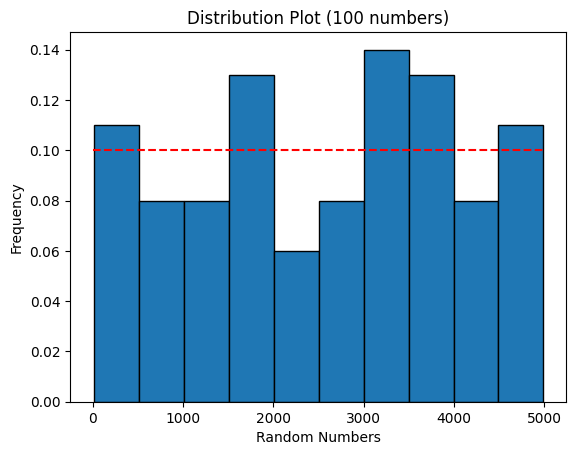

   Sample Size     Mean      Variance  Std Deviation
0          100  2579.24  2.180706e+06    1476.721227


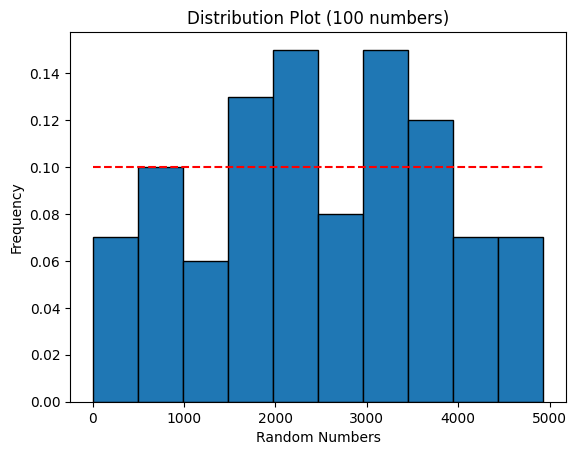

   Sample Size     Mean      Variance  Std Deviation
0          100  2495.14  1.670830e+06    1292.605957


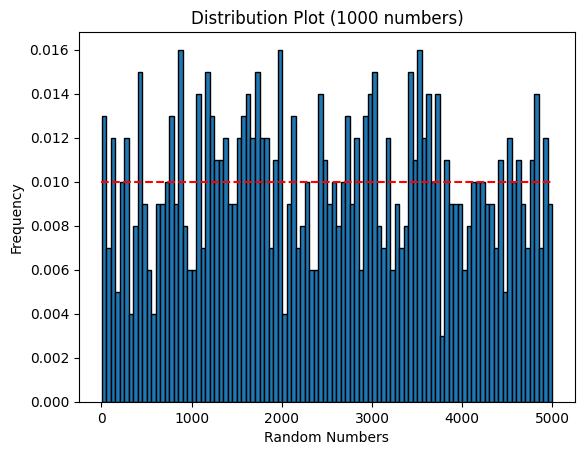

   Sample Size      Mean      Variance  Std Deviation
0         1000  2494.513  2.007842e+06    1416.983372


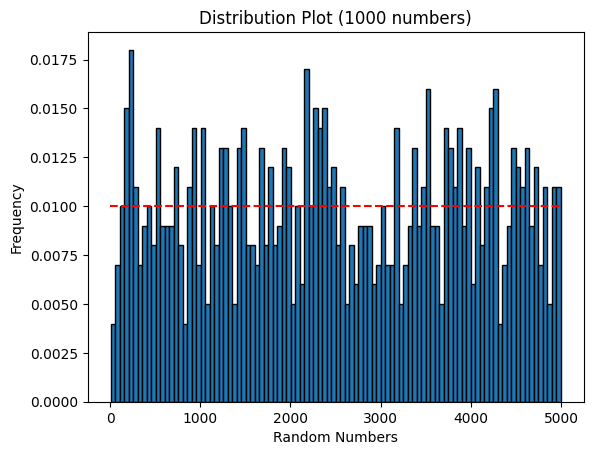

   Sample Size      Mean      Variance  Std Deviation
0         1000  2518.481  2.090414e+06    1445.826465


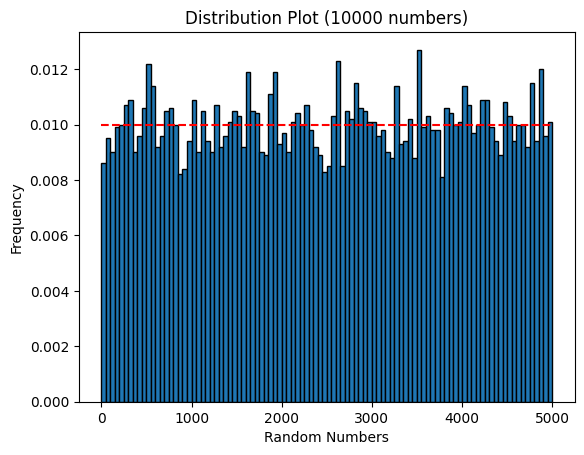

   Sample Size       Mean      Variance  Std Deviation
0        10000  2512.3939  2.085843e+06    1444.244708


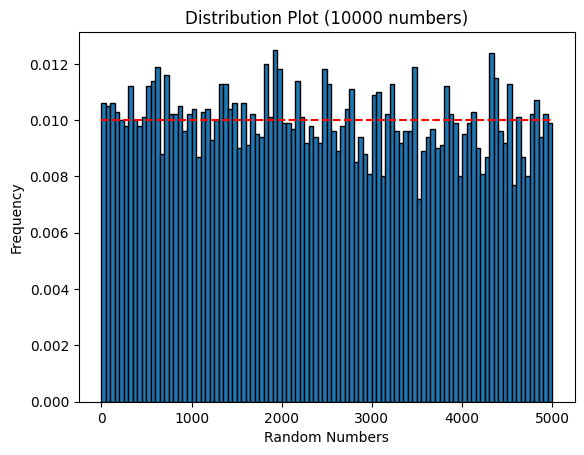

   Sample Size       Mean      Variance  Std Deviation
0        10000  2456.7112  2.088317e+06    1445.100992


In [7]:
upper_bound_value = 5000

for sample_size_value in [100, 1000, 10000]:
    seed_value = time.time_ns()
    
    analyzer = RandomNumberAnalyzer(ShufflingGeneratorWithRange(seed_value, upper_bound_value), sample_size_value)
    analyzer.analyze()
    
    analyzer = RandomNumberAnalyzer(StdGeneratorWithRange(upper_bound_value), sample_size_value)
    analyzer.analyze()


In [8]:
comparator = RandomNumberComparator(StdGeneratorWithRange(upper_bound_value), 2500)
comparator.analyze()

,M1,M1-M,M2,M2-M
0,2550.591,50.591,2550.591000,50.591000
1,2589.247,89.247,2569.919000,69.919000
2,2534.438,34.438,2558.092000,58.092000
3,2570.327,70.327,2561.150750,61.150750
4,2521.117,21.117,2553.144000,53.144000
5,2541.670,41.670,2551.231667,51.231667
6,2501.427,1.427,2544.116714,44.116714
7,2531.762,31.762,2542.572375,42.572375
8,2563.620,63.620,2544.911000,44.911000
9,2562.822,62.822,2546.702100,46.702100


In [9]:
seed_value = time.time_ns()
comparator = RandomNumberComparator(ShufflingGeneratorWithRange(seed_value, upper_bound_value), 2500)
comparator.analyze()

,M1,M1-M,M2,M2-M
0,2496.795,-3.205,2496.795000,-3.205000
1,2558.480,58.480,2527.637500,27.637500
2,2501.925,1.925,2519.066667,19.066667
3,2481.593,-18.407,2509.698250,9.698250
4,2517.607,17.607,2511.280000,11.280000
5,2510.908,10.908,2511.218000,11.218000
6,2456.988,-43.012,2503.470857,3.470857
7,2491.811,-8.189,2502.013375,2.013375
8,2421.641,-78.359,2493.083111,-6.916889
9,2523.820,23.820,2496.156800,-3.843200
